In [ ]:
# https://github.com/Element84/geo-notebooks/blob/main/notebooks/odc-planetary-computer.ipynb

In [ ]:
# pip install jupyter_bokeh
# pip install geogif
# pip install odc-geo

In [35]:
import os
import json
import yaml
import logging
import pystac
import hvplot.pandas
import pandas as pd
import geopandas as gpd
import holoviews as hv
import planetary_computer as pc
import panel as pn
import hvplot.xarray
import dask.distributed

from dask.distributed import wait
from IPython.display import HTML
from copy import deepcopy
from odc.stac import stac_load

from pystac_client import Client
from shapely.geometry import shape
from pystac.extensions.projection import ProjectionExtension
from pyproj import CRS
from geogif import gif, dgif

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
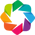

In [3]:
hv.extension('bokeh')
os.environ['AWS_REQUEST_PAYER'] = 'requester'
pd.set_option("display.max_colwidth", 150)
pd.reset_option("display.max_colwidth")

In [4]:
logging.basicConfig()
logger = logging.getLogger('pystac_client')
logger.setLevel(logging.INFO)

In [5]:
# create a function for later reuse
def plot_polygons(data, *args, **kwargs):
    return data.hvplot.paths(*args, geo=True, tiles='OSM', xaxis=None, yaxis=None,
                             frame_width=600, frame_height=600,
                             line_width=3, **kwargs)


# convert a list of STAC Items into a GeoDataFrame
def items_to_geodataframe(items):
    _items = []
    for i in items:
        _i = deepcopy(i)
        _i['geometry'] = shape(_i['geometry'])
        _items.append(_i)
    gdf = gpd.GeoDataFrame(pd.json_normalize(_items))
    for field in ['properties.datetime', 'properties.created', 'properties.updated']:
        if field in gdf:
            gdf[field] = pd.to_datetime(gdf[field])
    gdf.set_index('properties.datetime', inplace=True)
    return gdf

### Search for data

In [6]:
URL = 'https://planetarycomputer.microsoft.com/api/stac/v1'
cat = Client.open(URL)
print(cat)

<Client id=microsoft-pc>


In [7]:
collection = cat.get_collection('sentinel-2-l2a')

pd.DataFrame.from_dict(collection.to_dict()['item_assets'], orient='index')

gsd                                               type  \
AOT                 10.0  image/tiff; application=geotiff; profile=cloud...   
B01                 60.0  image/tiff; application=geotiff; profile=cloud...   
B02                 10.0  image/tiff; application=geotiff; profile=cloud...   
B03                 10.0  image/tiff; application=geotiff; profile=cloud...   
B04                 10.0  image/tiff; application=geotiff; profile=cloud...   
B05                 20.0  image/tiff; application=geotiff; profile=cloud...   
B06                 20.0  image/tiff; application=geotiff; profile=cloud...   
B07                 20.0  image/tiff; application=geotiff; profile=cloud...   
B08                 10.0  image/tiff; application=geotiff; profile=cloud...   
B09                 60.0  image/tiff; application=geotiff; profile=cloud...   
B11                 20.0  image/tiff; application=geotiff; profile=cloud...   
B12                 20.0  image/tiff; application=geotiff; profile=cloud...   
B8A                 20.0  image/tiff; application=geotiff; profile=cloud...   
SCL                 20.0  image/tiff; application=geotiff; profile=cloud...   
WVP                 10.0  image/tiff; application=geotiff; profile=cloud...   
visual              10.0  image/tiff; application=geotiff; profile=cloud...   
preview              NaN  image/tiff; application=geotiff; profile=cloud...   
safe-manifest        NaN                                    application/xml   
granule-metadata     NaN                                    application/xml   
inspire-metadata     NaN                                    application/xml   
product-metadata     NaN                                    application/xml   
datastrip-metadata   NaN                                    application/xml   

                          roles                                  title  \
AOT                      [data]        Aerosol optical thickness (AOT)   
B01                      [data]         Band 1 - Coastal aerosol - 60m   
B02                      [data]                    Band 2 - Blue - 10m   
B03                      [data]                   Band 3 - Green - 10m   
B04                      [data]                     Band 4 - Red - 10m   
B05                      [data]   Band 5 - Vegetation red edge 1 - 20m   
B06                      [data]   Band 6 - Vegetation red edge 2 - 20m   
B07                      [data]   Band 7 - Vegetation red edge 3 - 20m   
B08                      [data]                     Band 8 - NIR - 10m   
B09                      [data]             Band 9 - Water vapor - 60m   
B11                      [data]             Band 11 - SWIR (1.6) - 20m   
B12                      [data]             Band 12 - SWIR (2.2) - 20m   
B8A                      [data]  Band 8A - Vegetation red edge 4 - 20m   
SCL                      [data]          Scene classfication map (SCL)   
WVP                      [data]                     Water vapour (WVP)   
visual                   [data]                       True color image   
preview             [thumbnail]                              Thumbnail   
safe-manifest        [metadata]                          SAFE manifest   
granule-metadata     [metadata]                       Granule metadata   
inspire-metadata     [metadata]                       INSPIRE metadata   
product-metadata     [metadata]                       Product metadata   
datastrip-metadata   [metadata]                     Datastrip metadata   

                                                             eo:bands  
AOT                                                               NaN  
B01                 [{'name': 'B01', 'common_name': 'coastal', 'de...  
B02                 [{'name': 'B02', 'common_name': 'blue', 'descr...  
B03                 [{'name': 'B03', 'common_name': 'green', 'desc...  
B04                 [{'name': 'B04', 'common_name': 'red', 'descri...  
B05                 [{'name': 'B05', 'common_name': 'rededge', 'de..

In [9]:
aoi = gpd.read_file('aois/bear-fire.geojson')
geom = aoi['geometry'][0] # < shapely geometry object

# limit sets the # of items per page so we can see multiple pages getting fetched
search = cat.search(
    collections = ["sentinel-2-l2a"],
    intersects = geom,
    datetime = "2019-10-01/2019-10-31",
    query = ["eo:cloud_cover<25"],
    limit = 100
)

### Use GeoPandas to view footprints

In [10]:
# Get all items as a dictionary
items_dict = search.get_all_items_as_dict()['features']

# Create GeoDataFrame from Items
items_gdf = items_to_geodataframe(items_dict)

print(f"{len(items_dict)} items found")

/home/apolo/anaconda3/envs/geospatial/lib/python3.11/site-packages/pystac_client/item_search.py:911: FutureWarning: get_all_items_as_dict() is deprecated, use item_collection_as_dict() instead.
  warnings.warn(


12 items found


In [11]:
items_gdf.head()

id  \
properties.datetime                                                                   
2019-10-27 18:55:01.024000+00:00  S2A_MSIL2A_20191027T185501_R113_T10TFK_2020100...   
2019-10-27 18:55:01.024000+00:00  S2A_MSIL2A_20191027T185501_R113_T10SFJ_2020100...   
2019-10-22 18:54:29.024000+00:00  S2B_MSIL2A_20191022T185429_R113_T10TFK_2020100...   
2019-10-22 18:54:29.024000+00:00  S2B_MSIL2A_20191022T185429_R113_T10SFJ_2020100...   
2019-10-17 18:54:01.024000+00:00  S2A_MSIL2A_20191017T185401_R113_T10TFK_2020100...   

                                                                               bbox  \
properties.datetime                                                                   
2019-10-27 18:55:01.024000+00:00  [-121.834335, 39.6358715, -120.51955, 40.6447996]   
2019-10-27 18:55:01.024000+00:00  [-121.84912, 38.73593643111066, -120.55211, 39...   
2019-10-22 18:54:29.024000+00:00  [-121.834335, 39.6358715, -120.51955, 40.6447996]   
2019-10-22 18:54:29.024000+00:00  [-121.84912, 38.73593643111066, -120.55211, 39...   
2019-10-17 18:54:01.024000+00:00  [-121.834335, 39.6358715, -120.51955, 40.6447996]   

                                     type  \
properties.datetime                         
2019-10-27 18:55:01.024000+00:00  Feature   
2019-10-27 18:55:01.024000+00:00  Feature   
2019-10-22 18:54:29.024000+00:00  Feature   
2019-10-22 18:54:29.024000+00:00  Feature   
2019-10-17 18:54:01.024000+00:00  Feature   

                                                                              links  \
properties.datetime                                                                   
2019-10-27 18:55:01.024000+00:00  [{'rel': 'collection', 'type': 'application/js...   
2019-10-27 18:55:01.024000+00:00  [{'rel': 'collection', 'type': 'application/js...   
2019-10-22 18:54:29.024000+00:00  [{'rel': 'collection', 'type': 'application/js...   
2019-10-22 18:54:29.024000+00:00  [{'rel': 'collection', 'type': 'application/js...   
2019-10-17 18:54:01.024000+00:00  [{'rel': 'collection', 'type': 'application/js...   

                                                                           geometry  \
properties.datetime                                                                   
2019-10-27 18:55:01.024000+00:00  POLYGON ((-121.81731 40.6448, -120.51955 40.62...   
2019-10-27 18:55:01.024000+00:00  POLYGON ((-121.83284 39.7444, -120.55211 39.72...   
2019-10-22 18:54:29.024000+00:00  POLYGON ((-121.81731 40.6448, -120.51955 40.62...   
2019-10-22 18:54:29.024000+00:00  POLYGON ((-121.83284 39.7444, -120.55211 39.72...   
2019-10-17 18:54:01.024000+00:00  POLYGON ((-121.81731 40.6448, -120.51955 40.62...   

                                      collection  \
properties.datetime                                
2019-10-27 18:55:01.024000+00:00  sentinel-2-l2a   
2019-10-27 18:55:01.024000+00:00  sentinel-2-l2a   
2019-10-22 18:54:29.024000+00:00  sentinel-2-l2a   
2019-10-22 18:54:29.024000+00:00  sentinel-2-l2a   
2019-10-17 18:54:01.024000+00:00  sentinel-2-l2a   

                                                                    stac_extensions  \
properties.datetime                                                                   
2019-10-27 18:55:01.024000+00:00  [https://stac-extensions.github.io/eo/v1.0.0/s...   
2019-10-27 18:55:01.024000+00:00  [https://stac-extensions.github.io/eo/v1.0.0/s...   
2019-10-22 18:54:29.024000+00:00  [https://stac-extensions.github.io/eo/v1.0.0/s...   
2019-10-22 18:54:29.024000+00:00  [https://stac-extensions.github.io/eo/v1.0.0/s...   
2019-10-17 18:54:01.024000+00:00  [https://stac-extensions.github.io/eo/v1.0.0/s...   

                                 stac_version  \
properties.datetime                             
2019-10-27 18:55:01.024000+00:00        1.0.0   
2019-10-27 18:55:01.024000+00:00        1.0.0   
2019-10-22 18:54:29.024000+00:00        1.0.0   
2019-10-22 18:54:29.024000+00:00        1.0.0   
2019-10-17 18:54:01.024000+00:00        1.0.0   

      

In [12]:
plot_polygons(aoi) * items_gdf.hvplot.paths(geo=True)

:Overlay
   .WMTS.I  :WMTS   [Longitude,Latitude]
   .Path.I  :Path   [Longitude,Latitude]
   .Path.II :Path   [Longitude,Latitude]

### OpenDataCube

In [13]:
cfg = """---
sentinel-2-l2a:
  assets:
    '*':
      data_type: uint16
      nodata: 0
      unit: '1'
"""
cfg = yaml.load(cfg, Loader=yaml.CSafeLoader)

In [17]:
# Create PySTAC ItemCollection
item_collection = pystac.ItemCollection(items_dict)

dc = stac_load(
	item_collection,
    measurements=['B02', 'B03', 'B04', 'B08'],
    chunks={"x": 2048, "y": 2048},
    bbox=geom.bounds,
    stac_cfg=cfg,
    patch_url=pc.sign
)

In [18]:
dc

<xarray.Dataset> Size: 59MB
Dimensions:      (y: 1017, x: 1206, time: 6)
Coordinates:
  * y            (y) float64 8kB 4.395e+06 4.395e+06 ... 4.385e+06 4.385e+06
  * x            (x) float64 10kB 6.331e+05 6.331e+05 ... 6.451e+05 6.451e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 48B 2019-10-02T18:52:09.024000 ... 201...
Data variables:
    B02          (time, y, x) uint16 15MB dask.array<chunksize=(1, 1017, 1206), meta=np.ndarray>
    B03          (time, y, x) uint16 15MB dask.array<chunksize=(1, 1017, 1206), meta=np.ndarray>
    B04          (time, y, x) uint16 15MB dask.array<chunksize=(1, 1017, 1206), meta=np.ndarray>
    B08          (time, y, x) uint16 15MB dask.array<chunksize=(1, 1017, 1206), meta=np.ndarray>

### Calculations

In [ ]:
# from odc.algo import to_rgba

# https://odc-geo.readthedocs.io/en/latest/_api/odc.geo.xr.to_rgba.html
import odc.geo.xr

In [30]:
RGB = ['B04', 'B03', 'B02']
# vis = to_rgba(dc, clamp=(1, 3000), bands=RGB)
vis = dc.odc.to_rgba(bands=RGB, vmin=1, vmax=3000)
vis

<xarray.DataArray 'ro_rgba-ae7f41a878507483597f397cad69a436-d446e0c3c95f85092863759c30e8e373' (
                                                                                               time: 6,
                                                                                               y: 1017,
                                                                                               x: 1206,
                                                                                               band: 4)> Size: 29MB
dask.array<ro_rgba-ae7f41a878507483597f397cad69a436, shape=(6, 1017, 1206, 4), dtype=uint8, chunksize=(1, 1017, 1206, 4), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 8kB 4.395e+06 4.395e+06 ... 4.385e+06 4.385e+06
  * x            (x) float64 10kB 6.331e+05 6.331e+05 ... 6.451e+05 6.451e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 48B 2019-10-02T18:52:09.024000 ... 201...
  * band         (band) <U1 16B 'r' 'g' 'b' 'a'

In [31]:
ndvi = ((dc['B08'] - dc['B04']) / (dc['B08'] + dc['B04'])).clip(0, 1).rename("ndvi")
ndvi

<xarray.DataArray 'ndvi' (time: 6, y: 1017, x: 1206)> Size: 59MB
dask.array<clip, shape=(6, 1017, 1206), dtype=float64, chunksize=(1, 1017, 1206), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 8kB 4.395e+06 4.395e+06 ... 4.385e+06 4.385e+06
  * x            (x) float64 10kB 6.331e+05 6.331e+05 ... 6.451e+05 6.451e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 48B 2019-10-02T18:52:09.024000 ... 201...

### Start Dask Client

In [32]:
client = dask.distributed.Client()
client

/home/apolo/anaconda3/envs/geospatial/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39587 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:45329' processes=4 threads=16, memory=15.35 GiB>

### Compute

In [33]:
ndvi, vis = client.persist([ndvi, vis])
_ = wait([ndvi, vis])

/home/apolo/anaconda3/envs/geospatial/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


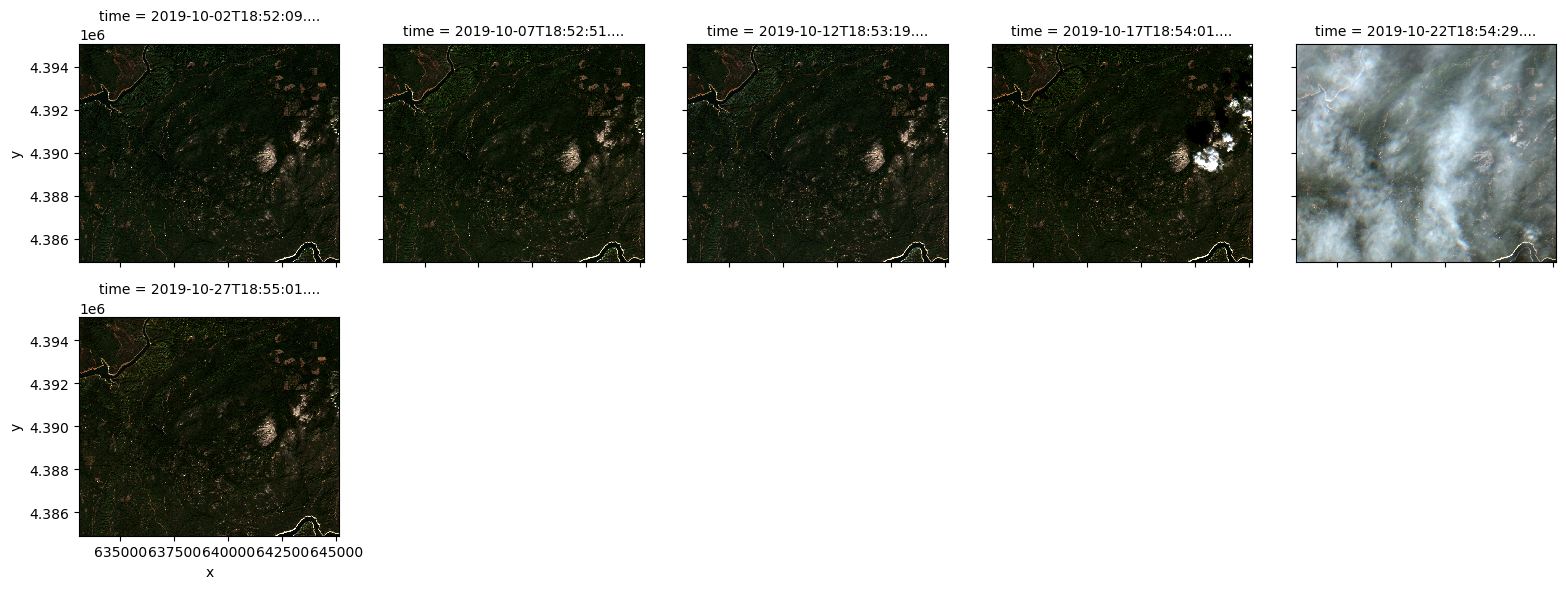

In [34]:
vis_ = vis.compute()
vis_.plot.imshow(col='time', rgb='band', col_wrap=5, robust=True)

In [36]:
hvplot_kwargs = {
    "frame_width": 800,
    "xaxis": None,
    "yaxis": None,
    "widget_location": "bottom",
    "aspect": len(vis.x)/len(vis.y)
}

vis_.hvplot.rgb('x', 'y', bands='band', groupby='time', **hvplot_kwargs)

BokehModel(combine_events=True, render_bundle={'docs_json': {'f85770b6-ca3f-43ba-a014-f2a7282a4c40': {'version…

In [37]:
ndvi_ = ndvi.compute()
ndvi_.hvplot('x', 'y', groupby='time', **hvplot_kwargs)

BokehModel(combine_events=True, render_bundle={'docs_json': {'808a7b9f-849f-4ce2-b020-6444450c8b38': {'version…

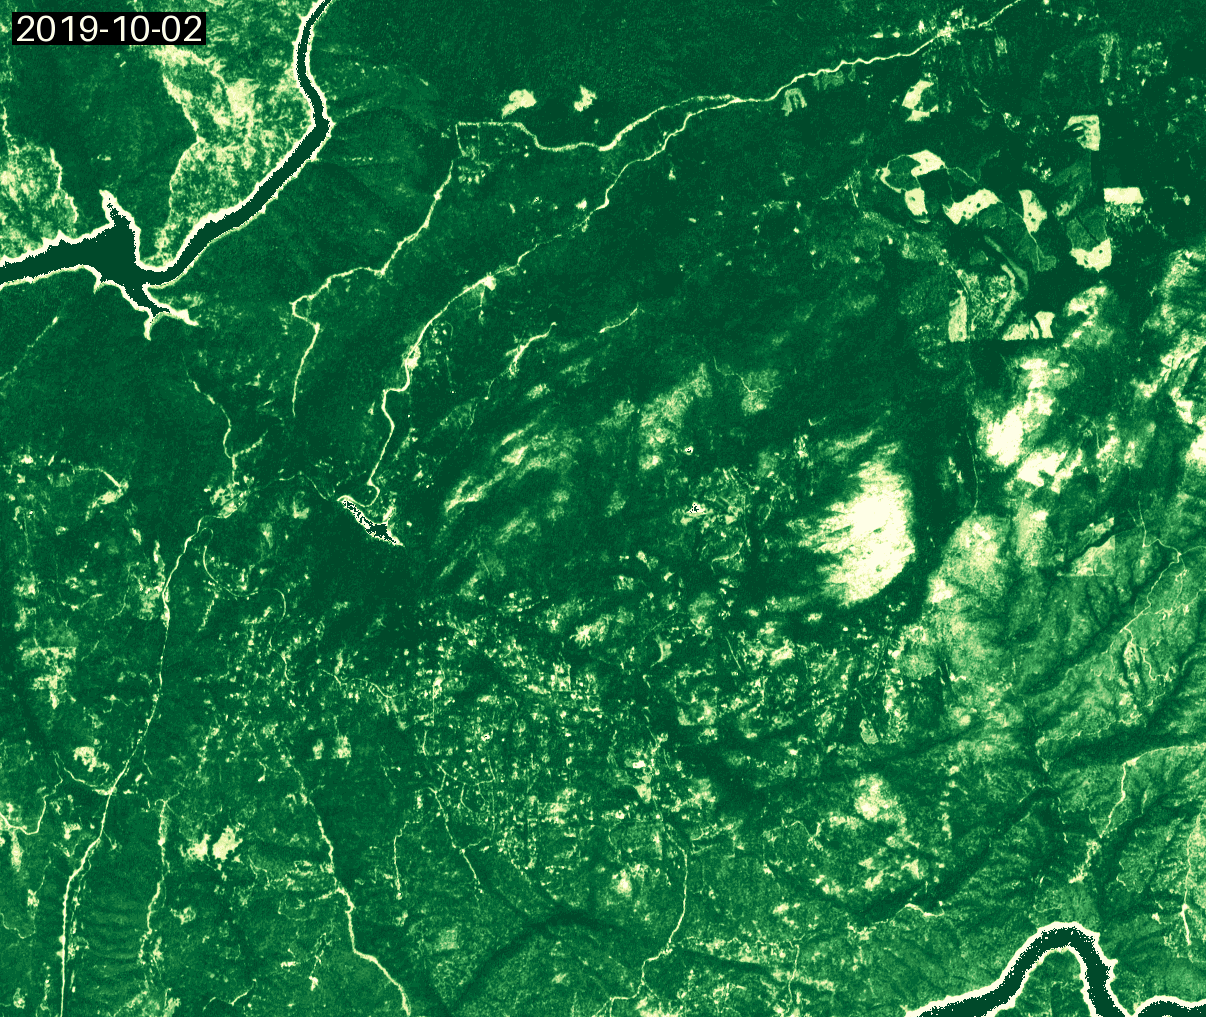

In [42]:
gif(ndvi_, fps=1, cmap='YlGn')

In [39]:
ndvi_mean = ndvi.mean(dim=['x', 'y']).compute()
ndvi_mean.hvplot()

:Curve   [time]   (ndvi)

### Shutdown cluster

In [40]:
client.close()